In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
models_results = []

In [3]:
def evaluate_model(model, X_train, y_train, X_test, y_test, zone="Whole City"):
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the metrics
    print(f"Model: {model}")
    print("====== Train ========")
    print(f"Training MSE: {train_mse:.7f}")
    print(f"Training MAE: {train_mae:.7f}")
    print(f"Training R-squared: {train_r2:.7f}")
    print("====== Test ========")
    print(f"Testing MSE: {test_mse:.7f}")
    print(f"Testing MAE: {test_mae:.7f}")
    print(f"Testing R-squared: {test_r2:.7f}")
    
    new_row = {
        "Zone": zone,
        "Model": str(model),
        "Train MSE": train_mse,
        "Train MAE": train_mae,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R2": test_r2
    }
    
  
    models_results.append(new_row)

    


In [4]:
def preprocess_data(df):
    # Melt the DataFrame to long format
    df_melted = df.melt(id_vars=['Zone', 'Model'], 
                        value_vars=['Train MSE', 'Train MAE', 'Train R2', 'Test MSE', 'Test MAE', 'Test R2'],
                        var_name='Metric', value_name='Value')

    # Split Metric into Data Type (Train/Test) and Actual Metric for easier plotting
    df_melted[['Data Type', 'Metric']] = df_melted['Metric'].str.split(' ', expand=True)
    
    return df_melted

In [5]:
def plot_results(df_melted):
   
    # Get unique metrics
    unique_metrics = df_melted['Metric'].unique()
    
    # Set the plot style
    sns.set(style="whitegrid")

    # Loop through each metric and create a separate plot
    for metric in unique_metrics:
        # Filter data for training and testing separately
        train_data = df_melted[(df_melted['Metric'] == metric) & (df_melted['Data Type'] == 'Train')]
        test_data = df_melted[(df_melted['Metric'] == metric) & (df_melted['Data Type'] == 'Test')]
        
        # Create separate plots for training and testing data
        for data, data_type in zip([train_data, test_data], ['Train', 'Test']):
            g = sns.catplot(
                data=data, kind="bar",
                x="Zone", y="Value", hue="Model",
                height=4, aspect=2, sharey=False
            )

            # Set plot titles and labels
            g.set_titles("{col_name} - " + metric)
            g.set_axis_labels(data_type + " " + str(metric), "Value")
            g.set_xticklabels(rotation=45)  
            
            # Adjust legend position and font size
            g._legend.set_bbox_to_anchor((1.1, 0.5))  
            g._legend.set_title('Model')  

            # Display the plot
            plt.tight_layout()
            plt.show()

# Test on Enhaced Data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

### Testing Decision Trees

In [8]:
X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [10]:
models = []
predictions = []
for i in range(3):
    model = DecisionTreeRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.0333534
Testing MAE: 0.1130437
Testing R-squared: 0.9664157
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.0300826
Testing MAE: 0.1054903
Testing R-squared: 0.9698448
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.0147420
Testing MAE: 0.0716676
Testing R-squared: 0.9851743


In [11]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.0255231
Testing MAE: 0.0970955
Testing R-squared: 0.9742835


## Fine Tuning Decision Trees

In [12]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)
""" params = {
    'max_depth': range(1, 26, 2)
}
model = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=5)
model.fit(XT_train, yT_train)
evaluate_model(model.best_estimator_, XT_train, yT_train, XT_test, yT_test, zone="Whole City") """
model = DecisionTreeRegressor(max_depth=19)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
====== Train ========
Training MSE: 0.0143572
Training MAE: 0.0871186
Training R-squared: 0.9856694
====== Test ========
Testing MSE: 0.0193224
Testing MAE: 0.1008597
Testing R-squared: 0.9805312
Model: DecisionTreeRegressor(max_depth=19)
====== Train 

In [13]:
models = []
predictions = []
for i in range(3):
    model = DecisionTreeRegressor(max_depth=19)
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

Model: DecisionTreeRegressor(max_depth=19)
====== Train ========
Training MSE: 0.0019415
Training MAE: 0.0169700
Training R-squared: 0.9980618
====== Test ========
Testing MSE: 0.0323835
Testing MAE: 0.1122407
Testing R-squared: 0.9673923
Model: DecisionTreeRegressor(max_depth=19)
====== Train ========
Training MSE: 0.0016665
Training MAE: 0.0150087
Training R-squared: 0.9983345
====== Test ========
Testing MSE: 0.0296376
Testing MAE: 0.1060639
Testing R-squared: 0.9702909
Model: DecisionTreeRegressor(max_depth=19)
====== Train ========
Training MSE: 0.0002988
Training MAE: 0.0056652
Training R-squared: 0.9997016
====== Test ========
Testing MSE: 0.0146982
Testing MAE: 0.0718688
Testing R-squared: 0.9852183


### Testing Random Forests

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
models_rf = []
predictions_rf = []
for i in range(3):
    model = RandomForestRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

/tmp/ipykernel_39583/2388378546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[i], y_train[i])


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0025441
Training MAE: 0.0328693
Training R-squared: 0.9974602
====== Test ========
Testing MSE: 0.0173524
Testing MAE: 0.0880556
Testing R-squared: 0.9825274


/tmp/ipykernel_39583/2388378546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[i], y_train[i])


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0021734
Training MAE: 0.0306838
Training R-squared: 0.9978278
====== Test ========
Testing MSE: 0.0160713
Testing MAE: 0.0838689
Testing R-squared: 0.9838900


/tmp/ipykernel_39583/2388378546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[i], y_train[i])


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0011817
Training MAE: 0.0211074
Training R-squared: 0.9988199
====== Test ========
Testing MSE: 0.0076579
Testing MAE: 0.0556705
Testing R-squared: 0.9922986


In [16]:
model_rf = RandomForestRegressor()
model_rf.fit(XT_train, yT_train)
evaluate_model(model_rf, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/tmp/ipykernel_39583/1480901663.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(XT_train, yT_train)


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0019193
Training MAE: 0.0280673
Training R-squared: 0.9980843
====== Test ========
Testing MSE: 0.0130362
Testing MAE: 0.0749675
Testing R-squared: 0.9868650


# Test on Original Data

In [17]:
df = pd.read_csv('data/data.csv')

targets = ["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['Zone 1 Power Consumption']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['Zone 2  Power Consumption']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['Zone 3  Power Consumption']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

In [18]:
X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]

In [19]:
models = []
predictions = []
for i in range(3):
    model = DecisionTreeRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.8351586
Testing MAE: 0.5497854
Testing R-squared: 0.1590597
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.8455804
Testing MAE: 0.5710726
Testing R-squared: 0.1523800
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 0.5439690
Testing MAE: 0.4428448
Testing R-squared: 0.4529408


In [20]:
df["total"] = df["Zone 1 Power Consumption"] + df["Zone 2  Power Consumption"] + df["Zone 3  Power Consumption"]

targetT = df["total"]
XT = df.drop(columns=["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption", "total"], axis=1)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 216022019.3143194
Testing MAE: 8664.8635093
Testing R-squared: 0.2593669


In [21]:
models_rf = []
predictions_rf = []
for i in range(3):
    model = RandomForestRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

/tmp/ipykernel_39583/2388378546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[i], y_train[i])


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0603075
Training MAE: 0.1672118
Training R-squared: 0.9397950
====== Test ========
Testing MSE: 0.4269454
Testing MAE: 0.4514046
Testing R-squared: 0.5700989


/tmp/ipykernel_39583/2388378546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[i], y_train[i])


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0608029
Training MAE: 0.1699307
Training R-squared: 0.9392328
====== Test ========
Testing MSE: 0.4229139
Testing MAE: 0.4557912
Testing R-squared: 0.5760660


/tmp/ipykernel_39583/2388378546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[i], y_train[i])


Model: RandomForestRegressor()
====== Train ========
Training MSE: 0.0397397
Training MAE: 0.1354276
Training R-squared: 0.9603153
====== Test ========
Testing MSE: 0.2895484
Testing MAE: 0.3729835
Testing R-squared: 0.7088068


In [22]:
model_rf = RandomForestRegressor()
model_rf.fit(XT_train, yT_train)
evaluate_model(model_rf, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: RandomForestRegressor()
====== Train ========
Training MSE: 15185083.5333632
Training MAE: 2620.8516245
Training R-squared: 0.9484250
====== Test ========
Testing MSE: 107550099.9275697
Testing MAE: 7096.9553252
Testing R-squared: 0.6312637


we can clearly see the effect of added features on the scores

# Testing XGBoost

In [23]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = XGBRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
====== Train ========
Training MSE: 0.0199326
Training MAE: 0.1037879
Training R-squared: 0.9801013
====== Test ========
Testing MSE: 0.0266517
Testing MAE: 0.1198190
Testing R-squared: 0.9731638
Model: XGBRegressor(base_score=None, booster=None, callb

<Figure size 1000x800 with 0 Axes>

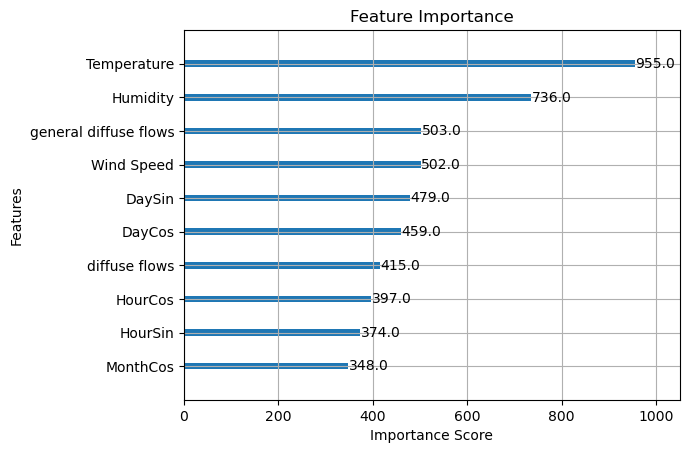

In [24]:
from xgboost import plot_importance
df["total"] = df["z1"] + df["z2"] + df["z3"]
feature_columns = df.drop(columns=["z1", "z2", "z3", "total"]).columns
targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
# Create the feature matrix
feature_columns = df.drop(columns=["z1", "z2", "z3", "total"]).columns
XT = df[feature_columns]
XT = pd.DataFrame(StandardScaler().fit_transform(XT), columns=feature_columns)

# Split the data into training and testing sets
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(XT_train, yT_train)

# Plot feature importance with actual feature names
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=10, title='Feature Importance', xlabel='Importance Score', ylabel='Features')
plt.show()

# Testing AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostRegressor

df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
y1 = df['z1']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = AdaBoostRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 9604734.3311258
Training MAE: 2526.8875360
Training R-squared: 0.8114149
====== Test ========
Testing MSE: 9401468.1947452
Testing MAE: 2502.6780179
Testing R-squared: 0.8138116
Model: AdaBoostRegressor()
====== Train ========
Training MSE: 6086525.0003108
Training MAE: 2010.6583971
Training R-squared: 0.7751611
====== Test ========
Testing MSE: 6046554.2898738
Testing MAE: 2002.6118234
Testing R-squared: 0.7759675
Model: AdaBoostRegressor()
====== Train ========
Training MSE: 8407568.0723034
Training MAE: 2449.6287808
Training R-squared: 0.8085402
====== Test ========
Testing MSE: 8408204.6181452
Testing MAE: 2445.7894520
Testing R-squared: 0.8071713


In [26]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = AdaBoostRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.1702486
Training MAE: 0.3392122
Training R-squared: 0.8300668
====== Test ========
Testing MSE: 0.1681258
Testing MAE: 0.3370853
Testing R-squared: 0.8306006


## Using StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = AdaBoostRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.1845852
Training MAE: 0.3503334
Training R-squared: 0.8157285
====== Test ========
Testing MSE: 0.1822266
Testing MAE: 0.3484861
Testing R-squared: 0.8165118


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.2202104
Training MAE: 0.3833343
Training R-squared: 0.7799188
====== Test ========
Testing MSE: 0.2184604
Testing MAE: 0.3807471
Testing R-squared: 0.7810127


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.2011754
Training MAE: 0.3829022
Training R-squared: 0.7991029
====== Test ========
Testing MSE: 0.2003628
Testing MAE: 0.3813726
Testing R-squared: 0.7984990


In [29]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = AdaBoostRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.1757461
Training MAE: 0.3450100
Training R-squared: 0.8245794
====== Test ========
Testing MSE: 0.1734174
Testing MAE: 0.3430400
Testing R-squared: 0.8252690


## Fine Tuning AdaBoost

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}
model = GridSearchCV(AdaBoostRegressor(), params, cv=3)
model.fit(XT_train, yT_train)
print("Grid Search resutls: ",model.best_params_)

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y 

Grid Search resutls:  {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}


In [41]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = AdaBoostRegressor(loss='exponential', n_estimators=100, learning_rate=1)
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=100)
====== Train ========
Training MSE: 0.1877623
Training MAE: 0.3569356
Training R-squared: 0.8125568
====== Test ========
Testing MSE: 0.1833600
Testing MAE: 0.3532872
Testing R-squared: 0.8153706


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=100)
====== Train ========
Training MSE: 0.2109068
Training MAE: 0.3752010
Training R-squared: 0.7892169
====== Test ========
Testing MSE: 0.2097165
Testing MAE: 0.3729811
Testing R-squared: 0.7897776


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=100)
====== Train ========
Training MSE: 0.1992546
Training MAE: 0.3779416
Training R-squared: 0.8010209
====== Test ========
Testing MSE: 0.1984186
Testing MAE: 0.3769507
Testing R-squared: 0.8004542


In [40]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = AdaBoostRegressor(loss='exponential', n_estimators=100, learning_rate=1)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=100)
====== Train ========
Training MSE: 0.1735691
Training MAE: 0.3444243
Training R-squared: 0.8267525
====== Test ========
Testing MSE: 0.1717352
Testing MAE: 0.3418652
Testing R-squared: 0.8269639


# Evaluation

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_39583/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


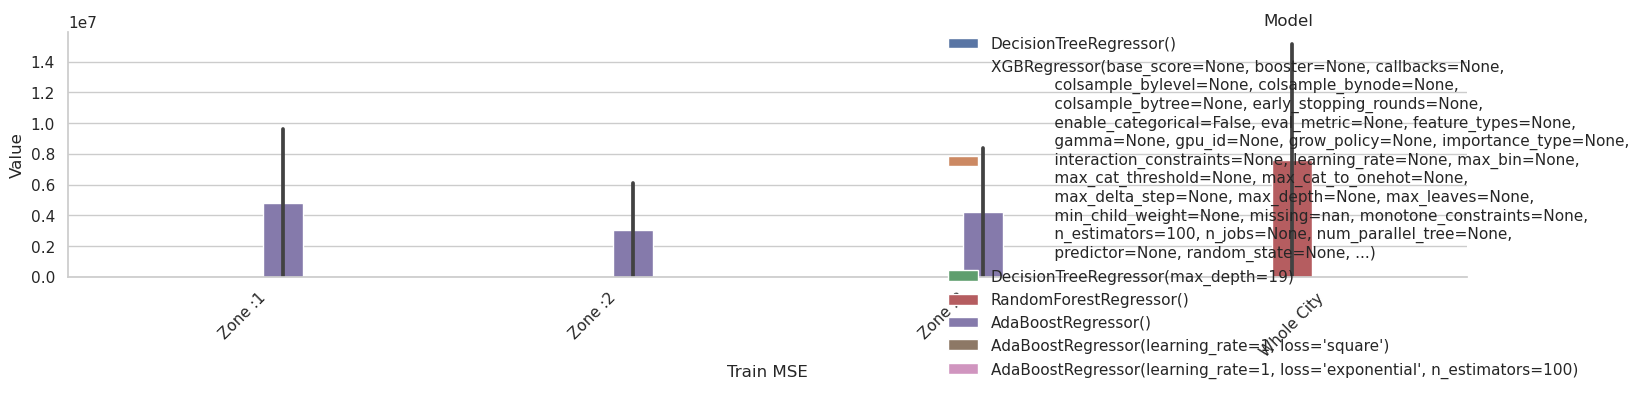

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_39583/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


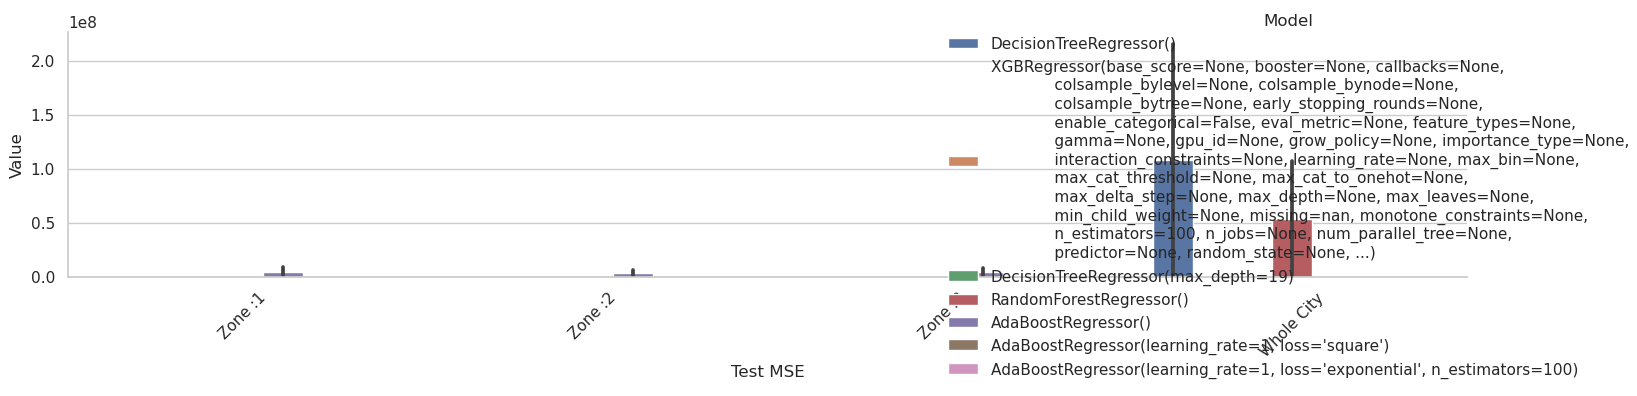

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_39583/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


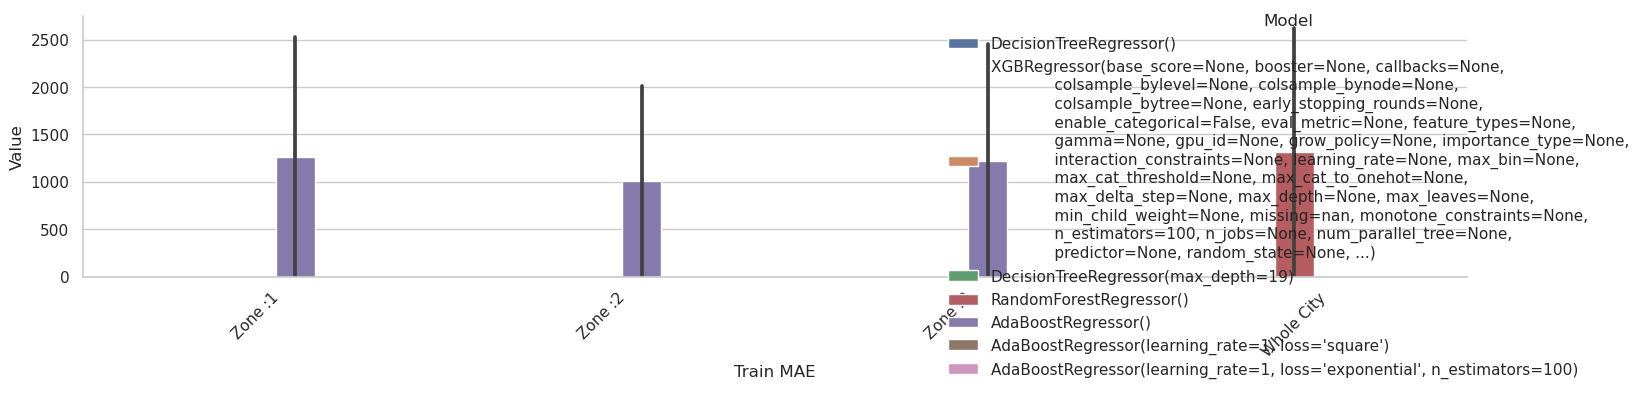

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_39583/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


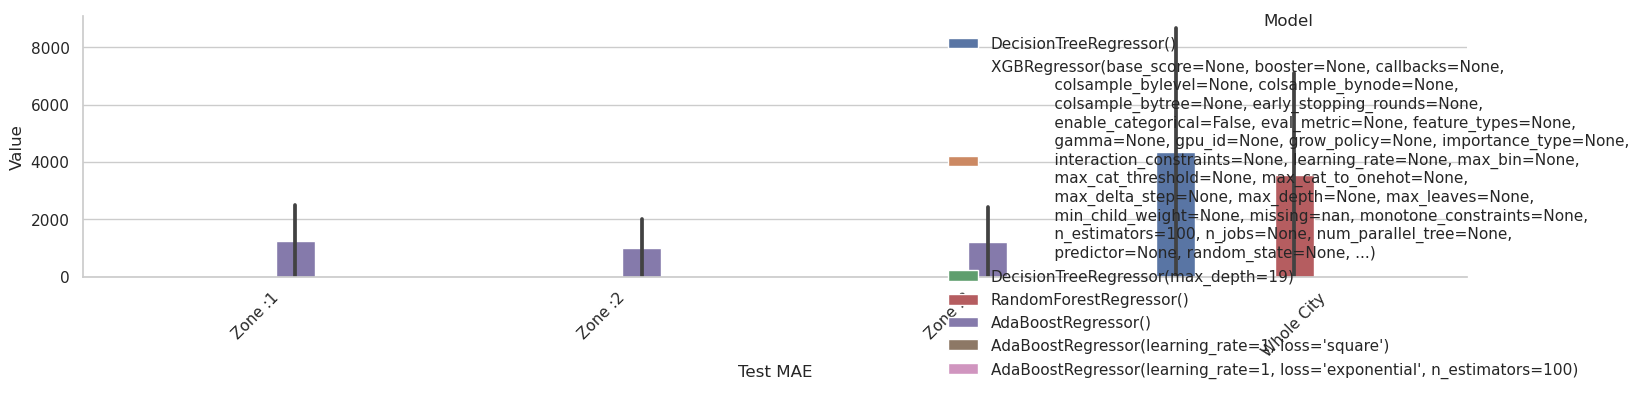

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_39583/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


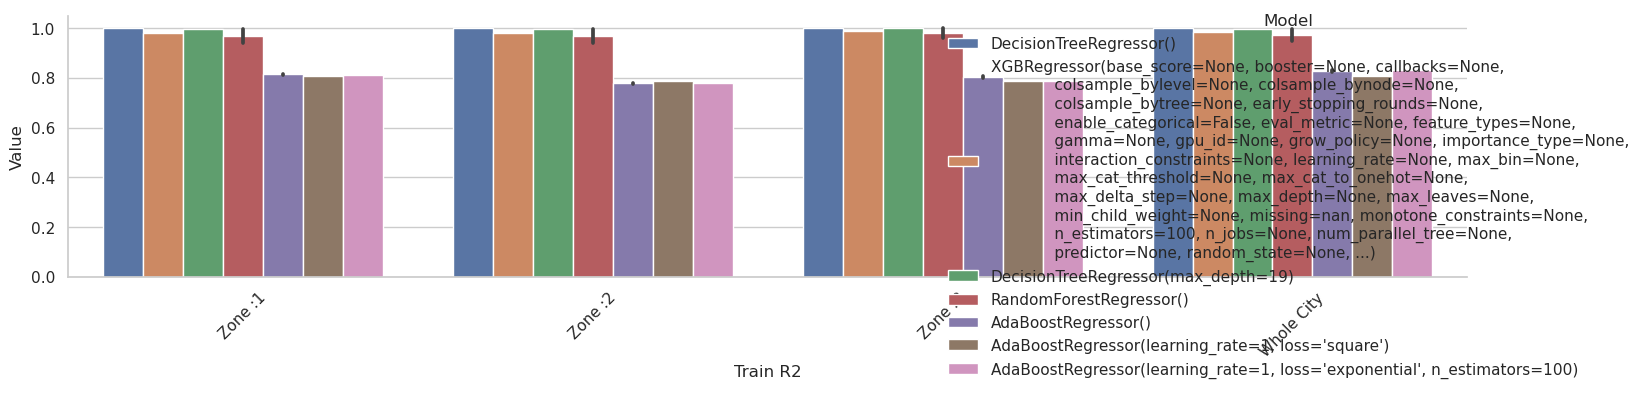

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_39583/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


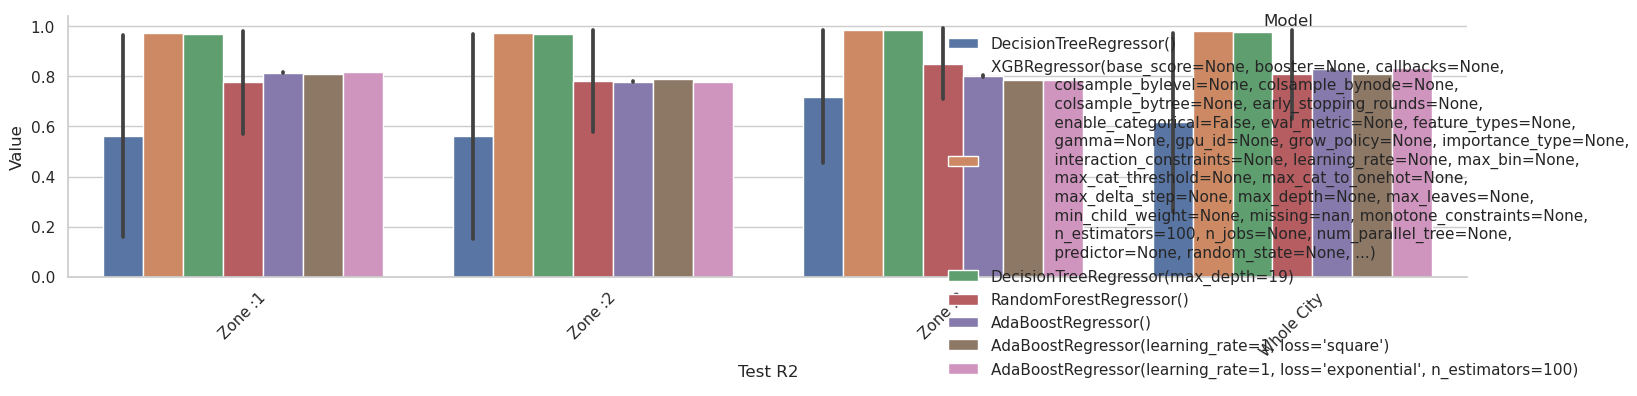

In [37]:
result_df = pd.DataFrame(models_results)

plot_results(preprocess_data(result_df))